In [1]:
#Importing the necessary packages

from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
trainDf = pd.read_csv("dataset/train_u6lujuX_CVtuZ9i.csv") 
trainDf.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
print(trainDf.shape)

(614, 13)


In [4]:
trainDf.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
trainDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [6]:
def missing_values(df): 
    a = num_null_values = df.isnull().sum()  
    return a 

In [7]:
missing_values(trainDf)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
trainDf.drop(["Loan_ID","Dependents","Gender","Married","CoapplicantIncome"], axis=1, inplace=True)
#X_train.drop(["Gender","Married","CoapplicantIncome"], axis=1, inplace=True)

In [10]:
n_cols = trainDf[["LoanAmount", "Loan_Amount_Term", "Credit_History"]] 
for i in n_cols: 
    trainDf[i].fillna(trainDf[i].mean(axis=0), inplace=True)
cols = trainDf[["Self_Employed"]] 
for  i in cols: 
    trainDf[i].fillna(trainDf[i].mode().iloc[0], inplace=True)

In [11]:
trainDf.head()

,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Graduate,No,5849,146.412162,360.0,1.0,Urban,Y
1,Graduate,No,4583,128.000000,360.0,1.0,Rural,N
2,Graduate,Yes,3000,66.000000,360.0,1.0,Urban,Y
3,Not Graduate,No,2583,120.000000,360.0,1.0,Urban,Y
4,Graduate,No,6000,141.000000,360.0,1.0,Urban,Y


In [12]:
from sklearn.preprocessing import OrdinalEncoder 

ord_enc = OrdinalEncoder() 
trainDf[['Education','Self_Employed','Property_Area','Loan_Status']] = ord_enc.fit_transform(trainDf[['Education','Self_Employed','Property_Area','Loan_Status']])
trainDf.head()

,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,0.0,5849,146.412162,360.0,1.0,2.0,1.0
1,0.0,0.0,4583,128.000000,360.0,1.0,0.0,0.0
2,0.0,1.0,3000,66.000000,360.0,1.0,2.0,1.0
3,1.0,0.0,2583,120.000000,360.0,1.0,2.0,1.0
4,0.0,0.0,6000,141.000000,360.0,1.0,2.0,1.0


In [13]:
trainDf.isnull().sum()

Education           0
Self_Employed       0
ApplicantIncome     0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
Loan_Status         0
dtype: int64

In [14]:
trainDf.head()

,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,0.0,5849,146.412162,360.0,1.0,2.0,1.0
1,0.0,0.0,4583,128.000000,360.0,1.0,0.0,0.0
2,0.0,1.0,3000,66.000000,360.0,1.0,2.0,1.0
3,1.0,0.0,2583,120.000000,360.0,1.0,2.0,1.0
4,0.0,0.0,6000,141.000000,360.0,1.0,2.0,1.0


In [15]:
trainDf.dtypes

Education           float64
Self_Employed       float64
ApplicantIncome       int64
LoanAmount          float64
Loan_Amount_Term    float64
Credit_History      float64
Property_Area       float64
Loan_Status         float64
dtype: object

In [16]:
trainSet, testSet = train_test_split(trainDf, random_state = 0)

In [17]:
def relevantInfo(df):
  X = df.iloc[:, 0:7]
  y = df.iloc[:, 7]
    
  #Preprocessing to handle the missing data using a regressor
  imp = IterativeImputer(max_iter = 10, random_state=0)
  imp.fit(X)
  newDf = imp.transform(X)

  return newDf , y.to_numpy()

In [18]:
trainDf.head()

,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,0.0,5849,146.412162,360.0,1.0,2.0,1.0
1,0.0,0.0,4583,128.000000,360.0,1.0,0.0,0.0
2,0.0,1.0,3000,66.000000,360.0,1.0,2.0,1.0
3,1.0,0.0,2583,120.000000,360.0,1.0,2.0,1.0
4,0.0,0.0,6000,141.000000,360.0,1.0,2.0,1.0


In [19]:
trainX, trainy = relevantInfo(trainSet)
testX, testy = relevantInfo(testSet)


In [20]:
trainX.shape

(460, 7)

In [21]:
trainy.shape

(460,)

In [22]:
def performExperiment(trainSet : tuple, testSet : tuple, max_depth : int = None, feature_names : list = None, class_names : list = None, criterion = "gini", min_samples_split : int = 2 , min_samples_leaf = 1, drawTree = (8,6)):
  #Importing the Decision tree classifier from sklearn:

  clf = tree.DecisionTreeClassifier(max_depth = max_depth, \
                                    criterion = criterion,\
                                    min_samples_split = min_samples_split,\
                                    min_samples_leaf = min_samples_leaf,\
                                    splitter = "best",\
                                    random_state = 0,\
                                    )
  X_train, y_train = trainSet
  X_test, y_test = testSet

  clf = clf.fit(X_train, y_train)

  y_pred = clf.predict(X_test)

  print("Accuracy of the decision tree on the test set: \n\n{:.3f}\n\n".format(accuracy_score(y_pred, y_test)))

  print("The confusion matrix is : ")
  
  fig, ax = plt.subplots(figsize=(3, 3))
  plot_confusion_matrix(clf, X_test, y_test, display_labels=class_names, ax=ax)
  plt.show()
  return clf

  if drawTree:
    print("Here is a diagram of the tree created to evaluate each sample:")
    fig, ax = plt.subplots(figsize=drawTree)
    imgObj = tree.plot_tree(clf, filled=True, ax=ax, feature_names = feature_names, class_names = class_names, impurity=False, proportion=True, rounded=True, fontsize = 10)
    plt.show()

def returnAccuracy(trainSet : tuple, testSet : tuple, max_depth : int = None, feature_names : list = None, class_names : list = None, criterion = "gini", min_samples_split : int = 2 , min_samples_leaf = 1):
  clf = tree.DecisionTreeClassifier(max_depth = max_depth, \
                                    criterion = criterion,\
                                    min_samples_split = min_samples_split,\
                                    min_samples_leaf = min_samples_leaf,\
                                    splitter = "best",\
                                    random_state = 0,\
                                    
                                    )
  X_train, y_train = trainSet
  X_test, y_test = testSet

  clf = clf.fit(X_train, y_train)

  y_pred = clf.predict(X_test)

  return accuracy_score(y_pred, y_test)

def giveAnExample(n : int):
  performExperiment((X_train, y_train),  (X_test, y_test), feature_names = iris["feature_names"], class_names = iris["target_names"], max_depth = n)

def plotDecisionBoundary(X, y, pair, clf):
  x_min, x_max = X[:, pair[0]].min() - 1, X[:, pair[0]].max() + 1
  y_min, y_max = X[:, pair[1]].min() - 1, X[:, pair[1]].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                      np.arange(y_min, y_max, 0.1))
  
  y_pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  y_pred = y_pred.reshape(xx.shape)
  plt.figure(figsize=(5,4))
  plt.contourf(xx, yy, y_pred, alpha=0.4)
  plt.scatter(X[:, pair[0]], X[:, pair[1]], c = y, s = 50, edgecolor='k')
  # plt.legend()
  plt.show()

In [23]:
testX.shape
trainDf.columns

Index(['Education', 'Self_Employed', 'ApplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [24]:
trainDf.head()

,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,0.0,5849,146.412162,360.0,1.0,2.0,1.0
1,0.0,0.0,4583,128.000000,360.0,1.0,0.0,0.0
2,0.0,1.0,3000,66.000000,360.0,1.0,2.0,1.0
3,1.0,0.0,2583,120.000000,360.0,1.0,2.0,1.0
4,0.0,0.0,6000,141.000000,360.0,1.0,2.0,1.0


Accuracy of the decision tree on the test set: 

0.818


The confusion matrix is : 


C:\Users\heart\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


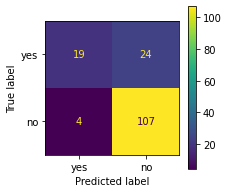

Here is a diagram of the tree created to evaluate each sample:


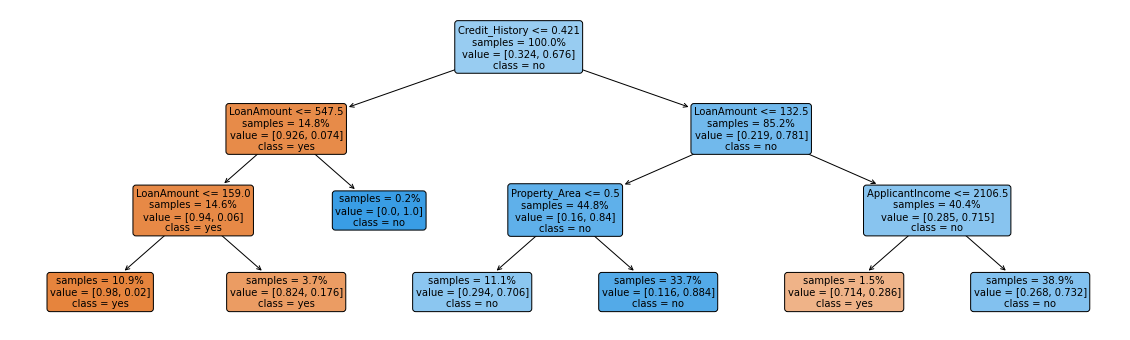

In [39]:
clf=performExperiment((trainX, trainy), (testX, testy), max_depth = 3, feature_names=[trainDf.columns[i] for i in range(7)], class_names=["yes","no"], drawTree=(20, 6))

performExperiment((trainX, trainy), (testX, testy), max_depth = 3, feature_names=[trainDf.columns[i] for i in [2,3,4,6,7,8,9]], class_names=["Loan_Status"], drawTree=(20, 6))

In [43]:
print(type(clf))
import joblib 
joblib.dump(clf, "modelclf.pkl") 
model = joblib.load('modelclf.pkl' ) 
model.predict(testX)

<class 'NoneType'>


AttributeError: 'NoneType' object has no attribute 'predict'

In [45]:
clf = tree.DecisionTreeClassifier(max_depth = 3, \
                                    criterion = "gini",\
                                    min_samples_split = 2,\
                                    min_samples_leaf =1,\
                                    splitter = "best",\
                                    random_state = 0,\
                                    )
clf.fit(trainX,trainy)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [46]:
y_pred = clf.predict(testX)

print("Accuracy of the decision tree on the test set: \n\n{:.3f}\n\n".format(accuracy_score(y_pred, testy)))

Accuracy of the decision tree on the test set: 

0.818




In [47]:
print(type(clf))
import joblib 
joblib.dump(clf, "modelclf.pkl") 
model = joblib.load('modelclf.pkl' ) 
model.predict(testX)

<class 'sklearn.tree._classes.DecisionTreeClassifier'>


array([1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1.,
       1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1.,
       0.])